# Linear Regression



در این مدل از داده های آماده استفاده کردیم
این داده راجب اطلاعات خانه و مردمان کالیفرنیا هست و این الگوریتم درواقعه برای تحلیل جغرافیای درآمد بکار میرود.

In this model, we used prepared data.
This data is about houses and people in California, and the algorithm is actually used for analyzing income geography.



 توجه توضیح یسری از سلول ها اگر وجود نداره در فایل
music.ipynb
 هست


 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.io.sas.sas_constants import column_type_offset
from sklearn.datasets import fetch_california_housing


>
در اینجا، داده‌ها به قالب ستونی تبدیل می‌شوند.

Here, the data is converted into a columnar format.

In [2]:
data=fetch_california_housing()
df=pd.DataFrame(data.data, columns=data.feature_names)
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 


در این قسمت ما با استفاده از تابعه ذکر شده اطلاعاتی از داده آماده ای که قراره از آن استفاده کنیم دریافت میکنیم.

In this section, we receive information from the prepared data that we are going to use using the mentioned function.


In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

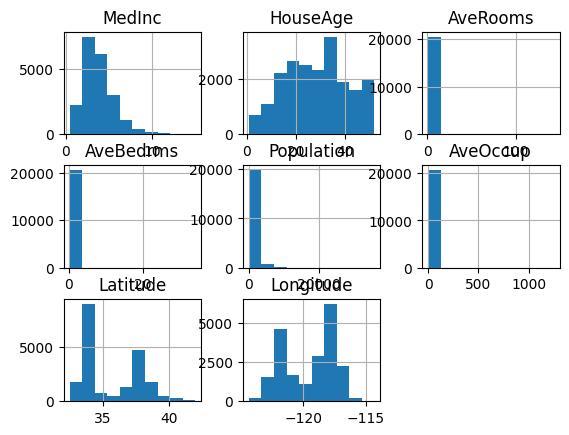

In [5]:
df.hist()

In [41]:
x=df[['AveRooms','AveBedrms','Latitude','Longitude']]


In [42]:
y=df['MedInc'].values
x=np.asanyarray(x)

Text(0, 0.5, 'MedInc')

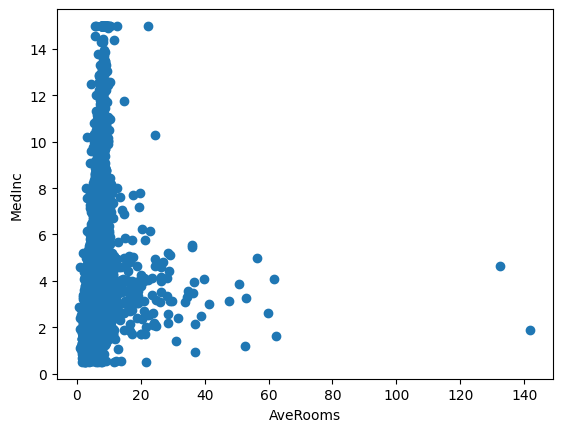

In [43]:
plt.scatter(df.AveRooms,df.MedInc)
plt.xlabel('AveRooms')
plt.ylabel('MedInc')

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

print('test size:',x_train.shape,y_train.shape)
print('train size:',x_test.shape,y_test.shape)

test size: (16512, 4) (16512,)
train size: (4128, 4) (4128,)


Text(0, 0.5, 'MedInc')

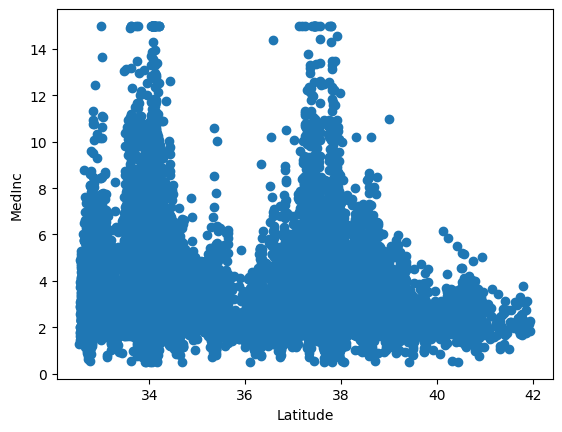

In [45]:
plt.scatter(df.Latitude,df.MedInc)
plt.xlabel('Latitude')
plt.ylabel('MedInc')

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_perd=model.predict(x_test)
y_perd

array([4.14776488, 3.45329548, 3.03712907, ..., 3.91590921, 3.22486721,
       5.54519905], shape=(4128,))



این معیار میزان خطا در یادگیری رو میگوید.
میزان و مقدار بالا نشون دهنده خطای زیاد هست.


This metric indicates the amount of error in learning.
A high value indicates a large error.


In [48]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_perd)
mse

1.4552179772480214



معیار ضریب خطا نشون دهنده اینکه کدام ویژگی ها بیشترین تاثیر و نفوذ رو در پیش بینی داشتن.

the error coefficient metric indicates which features had the most influence and impact on the prediction.

و معیار #(رهگیری) یا اینترسپت نشون دهنده این هست که اگر همه ویژگی ها برابر 0 باشه بازم خروجی تولید میشه؟

the intercept metric indicates whether the model still produces an output when all features are equal to zero.

In [49]:
print('کدام ویژگی ها بیشترین نقش رو در پیش بینی دارن',model.coef_)
print('intercepht',model.intercept_)

کدام ویژگی ها بیشترین نقش رو در پیش بینی دارن [ 1.04175506 -4.63393967 -0.67109645 -0.62536405]
intercepht -47.56700617805397




این معیار ارزیابی نشون دهنده این هست که مدل چقدر  توانسته از درصد خطای موجود رو کم کنه؟
 نمره ۶۱ نمره‌ی بالایی نیست، اما خیلی ضعیف هم محسوب نمی‌شه. بهتره مدل رو با داده‌های جدیدامتحان کنیم تا عملکردش بهتر سنجیده بشه


This evaluation metric indicates how much of the existing error percentage the model has been able to reduce.
A score of 61 is not a high score, but it is not considered very weak either. It is better to test the model with new data to evaluate its performance more accurately.


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_perd)

0.6105685867607598



به طور کلی , این الگورییتم خوب عمل نکرده است . یک الگوریتم متوسط روبه ضعیف هست.

overall, this algorithm has not performed well. It is an average to weak algorithm.